# Exo comparaison reg logistique vs SVM

In [71]:
# Librairires utiles
import pandas
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import random as rd

  ## Création du jeu de données

In [72]:
# On créé un jeu de données aléatoire
rd.seed(1)

i = 0
cat =[]
x = []
y = []

for i in range(0, 150):
        f =  rd.randrange(0, 1000, 1) / 1000
        x.append(f)

        if f > 0.5:
            #g = rd.randrange(400, 1000, 1)/1000
            g = rd.gauss(800, 150) / 1000
            y.append(g)
            cat.append(1)
        else:
            #g = rd.randrange(0, 600, 1)/1000
            g = rd.gauss(200, 100) / 1000
            y.append(g)
            cat.append(0)

        i += 1

In [73]:
max(x)
min(x)

0.001

+ On a donc "cat" qui sépare linéairement les y en 0 s'ils n'exèdent pas une certaine valeur, 1 sinon.
+ On a l'objet y avec des valeurs allant de 0.002 à 1.19
+ On a l'objet x avec des valeurs allant de 0.001 à 0.999

### Modification type et mise en forme pour application modèles

In [74]:
# On passe le type en mode numeric
x = np.array(x)
y = np.array(y)
cat = np.array(cat)

# On recale les données entre -1 et 1 pour pouvoir appliquer la reg logistique
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [75]:
print(type(x))

<class 'numpy.ndarray'>


In [76]:
print(type(y))

<class 'numpy.ndarray'>


In [77]:
print(type(cat))

<class 'numpy.ndarray'>


In [78]:
# On rassemble X et Y dans un data frame nommé 'var'
var = list(zip(x, y))
var = pd.DataFrame(var)
print(var)

           0                       1
0    [0.137]  [0.036708093678303355]
1    [0.064]   [0.12415601482026721]
2    [0.261]   [0.32483260073967873]
3    [0.483]   [0.31419069093111857]
4    [0.667]    [0.7251012816505089]
..       ...                     ...
145  [0.742]    [0.7900253945580772]
146  [0.041]   [0.25255499079992916]
147  [0.932]     [0.846407871304357]
148  [0.551]    [0.8583586009080052]
149  [0.614]    [1.0462703765096968]

[150 rows x 2 columns]


In [79]:
print(type(var))

<class 'pandas.core.frame.DataFrame'>


## Régression logistique

In [80]:
modele_logit = LogisticRegression(penalty='none',solver='newton-cg')
modele_logit.fit(var, cat)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

## SVM

In [85]:
# graph ?
px, py = np.mgrid[-1:1:.01, -1:1:.01]
grid = np.c_[px.ravel(), py.ravel()]
probs = modele_logit.predict_proba(grid)[:, 1].reshape(px.shape)

In [88]:
modele_svm = svm.SVC(gamma = 0.001, C = 1000, kernel = 'linear')
modele_svm.fit(var, cat)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Graph de comparaison

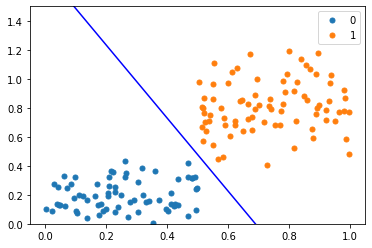

In [89]:
df = pd.DataFrame(list(zip(x, y, cat)), columns = ['x', 'y', 'cat'])

#print(df.head())

groups = df.groupby('cat')

#plt.plot(x, y, linestyle = 'none', marker = 'o', color = 'red')

fig, ax = plt.subplots()

for cat, group in groups:
    ax.plot(group.x, group.y, marker = 'o', linestyle = '', ms = 5, label = cat)
ax.legend()

w = svm_fit.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 1)
yy = a * xx - (svm_fit.intercept_[0]) / w[1]

plt.ylim(0, 1.5)

plt.plot(xx, yy, 'k-', color = 'blue')